# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the dataset

In [2]:
data = pd.read_csv('Breast_Cancer.TXT')

In [3]:
data.head()

,clump_thickness,cell_shape_uniformity,cell_size_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


# Exploratory Data Analysis

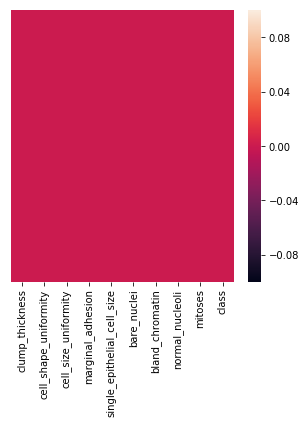

In [4]:
plt.figure(figsize=(5,5))
sns.heatmap(data.isnull(),yticklabels=False)

In [5]:
data.isna().sum()

clump_thickness                0
cell_shape_uniformity          0
cell_size_uniformity           0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

### Counting distribution of Malignant & Benign classes

Benign:  458
Malignant :  241


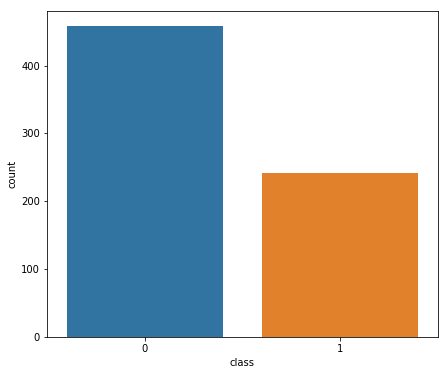

In [6]:
# Visualization using Count Plot
plt.figure(figsize=(7, 6))
sns.countplot(data['class'])

# Class Count
benign, malignant =data['class'].value_counts()
print('Benign: ', benign)
print('Malignant : ', malignant)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness                699 non-null int64
cell_shape_uniformity          699 non-null int64
cell_size_uniformity           699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null object
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [8]:
data.describe()

,clump_thickness,cell_shape_uniformity,cell_size_uniformity,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


## Let's check bare_nuclei column as it has datatype object & it didn't occur in describe() command

In [9]:
data['bare_nuclei']

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      *
24      1
25      7
26      1
27      1
28      1
29      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: bare_nuclei, Length: 699, dtype: object

### There are null values depicted as '*'

In [10]:
data.bare_nuclei[data['bare_nuclei']=='*'].count()

16

## Converting * into nan (numpy's not a number)

In [11]:
mask3 = data['bare_nuclei'] == '*'
data.loc[mask3, 'bare_nuclei'] = np.nan

In [12]:
data['bare_nuclei'][23]

nan

## Converting datatype of bare_nuclei to numeric

In [13]:
data.bare_nuclei = pd.to_numeric(data.bare_nuclei)

In [14]:
data['bare_nuclei'].dtype

dtype('float64')

## Handling Null Values

In [15]:
data.isna().sum()

clump_thickness                 0
cell_shape_uniformity           0
cell_size_uniformity            0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

## Replacing null values with mean

In [16]:
bnmean = round(data.bare_nuclei.mean() , 1)
data.bare_nuclei.fillna(bnmean , inplace=True)

In [17]:
data.isna().sum()

clump_thickness                0
cell_shape_uniformity          0
cell_size_uniformity           0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

### There is no null value now. Data is now cleaned

## Independent Variables (Features) & Dependent Variable (Response)

In [18]:
X = data.iloc[:, :9].values
X.shape

(699, 9)

In [19]:
y = data.iloc[:, -1].values
y.shape

(699,)

## Splitting into Training and Test data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# K-Fold Cross Validation to avoid Overfitting

In [21]:
CV = []
for i in range(2, 15):
    CV.append(i)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(solver='lbfgs')

cvScores = {}       # K-fold Cross Validation
for k in CV:
    cvScores[k] = np.mean(cross_val_score(logreg, X, y, cv=k))

k = 2, Cross validation score = 0.9671101105198527
k = 3, Cross validation score = 0.9614527110642251
k = 4, Cross validation score = 0.9657461934617108
k = 5, Cross validation score = 0.9643255122345893
k = 6, Cross validation score = 0.9643489587235935
k = 7, Cross validation score = 0.9644678753589645
k = 8, Cross validation score = 0.9686335091519613
k = 9, Cross validation score = 0.967199467199467
k = 10, Cross validation score = 0.9672221736214388
k = 11, Cross validation score = 0.9672393578643579
k = 12, Cross validation score = 0.9687025131502045
k = 13, Cross validation score = 0.9673092805168276
k = 14, Cross validation score = 0.9673086377408106


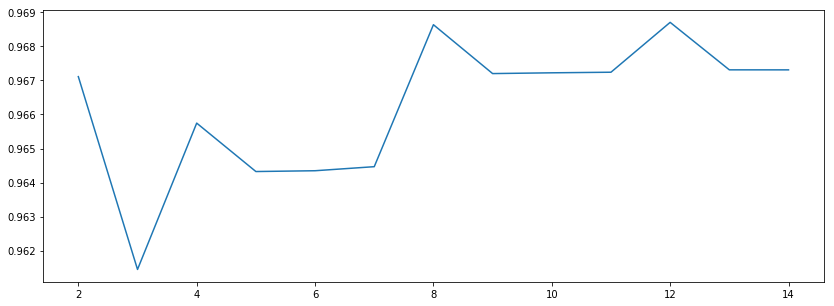

In [23]:
for k, score in cvScores.items():
    print("k = {}, Cross validation score = {}".format(k, score))
    
plt.figure(figsize=(14, 5))
plt.plot(CV, cvScores.values())

## We will use k = 8 to avoid overfitting

## Ridge Regularization to penalize the high value coefficients to generalize the model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [25]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8)
param_grid = {'C': c_space}

logreg = LogisticRegression(penalty='l2', solver='lbfgs') # Ridge Regularization

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=8)

logreg_cv.fit(X_train, y_train)

print("Tuned Hyperparameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Hyperparameters: {'C': 0.00828642772854685}
Best score is 0.9599236641221374


# Predictions using our Tuned Logistic Regression Model

In [26]:
y_pred = logreg_cv.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

# Evaluating the model

In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[105   2]
 [  2  66]]


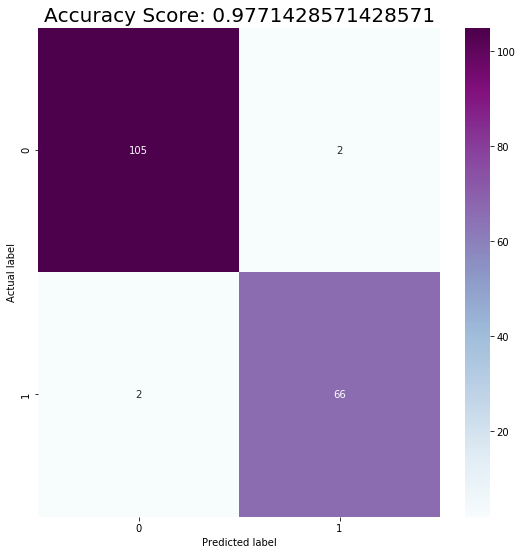

In [28]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True , fmt=".0f", cmap = "BuPu")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(logreg_cv.score(X_test, y_test))
plt.title(title, size = 20);

## Accuracy of the model

In [29]:
print("The accuracy of the model on the test set is: ", logreg_cv.score(X_test, y_test))

The accuracy of the model on the test set is:  0.9771428571428571


# -------------------------------------------------------------------------------------------------------------